In [1]:
import os
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus.reader import PlaintextCorpusReader
from nltk.corpus import stopwords
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
en_stopwords = stopwords.words('english')

In [4]:
data_dir = os.path.expanduser('/Users/francesco.mambrini/Documents/sync/data/corpora/hp/cleared/')
os.path.isdir(data_dir)

True

In [5]:
chilit = PlaintextCorpusReader(root=data_dir, fileids='.*\.txt')

In [6]:
flist = chilit.fileids()

In [7]:
print(chilit.raw(fileids=flist[0])[:500])

THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, 
were proud to say that they were perfectly normal, 
thank you very much. They were the last people you’d 
expect to be involved in anything strange or 
mysterious, because they just didn’t hold with such 
nonsense. 

Mr. Dursley was the director of a firm called 
Grunnings, which made drills. He was a big, beefy 
man with hardly any neck, although he did have a 
very large mustache. Mrs. Dursley was thin and 
blonde and had


In [8]:
words = chilit.words(fileids=flist[0])
words[20:50]

['to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 ',',
 'thank',
 'you',
 'very',
 'much',
 '.',
 'They',
 'were',
 'the',
 'last',
 'people',
 'you',
 '’',
 'd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious']

In [9]:
preproc_texts = [chilit.raw(fileids=d) for d in flist]

In [10]:
vectorizer = TfidfVectorizer()

In [11]:
vectors = vectorizer.fit_transform(preproc_texts)

In [12]:
feature_names = vectorizer.get_feature_names()

/opt/homebrew/Caskroom/miniforge/base/envs/data/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names, index=flist)

In [14]:
df.head()

,01,10,11,111,12,125,1289,1296,12th,13,...,zis,zograf,zombie,zone,zonko,zoo,zoological,zoom,zoomed,zooming
Book1.txt,0.0,0.000156,0.000623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000617,0.000000,0.000000,0.002158,0.000000,0.000229,0.000156,0.000353
Book2.txt,0.0,0.000140,0.000421,0.000000,0.000278,0.000000,0.000335,0.000000,0.000000,0.000237,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000555,0.000000,0.000000,0.000280,0.000000
Book3.txt,0.0,0.000111,0.000556,0.000429,0.000000,0.000265,0.000000,0.000265,0.000000,0.000000,...,0.000000,0.000000,0.000220,0.000000,0.001798,0.000000,0.000000,0.000000,0.001001,0.000378
Book4.txt,0.0,0.000062,0.000309,0.000159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000858,0.000295,0.000000,0.000000,0.000091,0.000000,0.000148,0.000364,0.000557,0.000842
Book5.txt,0.0,0.000047,0.000236,0.000243,0.000000,0.000000,0.000000,0.000000,0.000225,0.000080,...,0.000000,0.000000,0.000000,0.000112,0.000208,0.000000,0.000000,0.000139,0.001084,0.000374


In [15]:
df.loc['Book1.txt'].max()

0.5644807861815424

In [16]:
df['school']

Book1.txt    0.010739
Book2.txt    0.015700
Book3.txt    0.007559
Book4.txt    0.006684
Book5.txt    0.005562
Book6.txt    0.008161
Book7.txt    0.003735
Name: school, dtype: float64

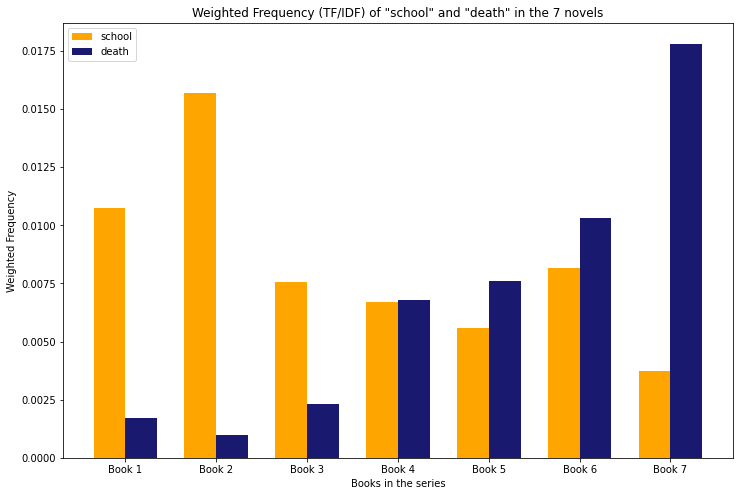

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Sample data
categories = ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5', 'Book 6', 'Book 7']
values1 = df['school']
values2 = df['death']

# Create an array of x positions for the bars
x = np.arange(len(categories))

# Define the width of the bars
bar_width = 0.35

# Create the bar plot for the first set of data
plt.bar(x - bar_width/2, values1, bar_width, label='school', color='orange')

# Create the bar plot for the second set of data
plt.bar(x + bar_width/2, values2, bar_width, label='death', color='midnightblue')

plt.xlabel('Books in the series')
plt.ylabel('Weighted Frequency')

# Set the x-axis ticks and labels
plt.xticks(x, categories)

# Add a legend
plt.legend()

# Add a title
plt.title('Weighted Frequency (TF/IDF) of "school" and "death" in the 7 novels')


# Show the plot
plt.show()


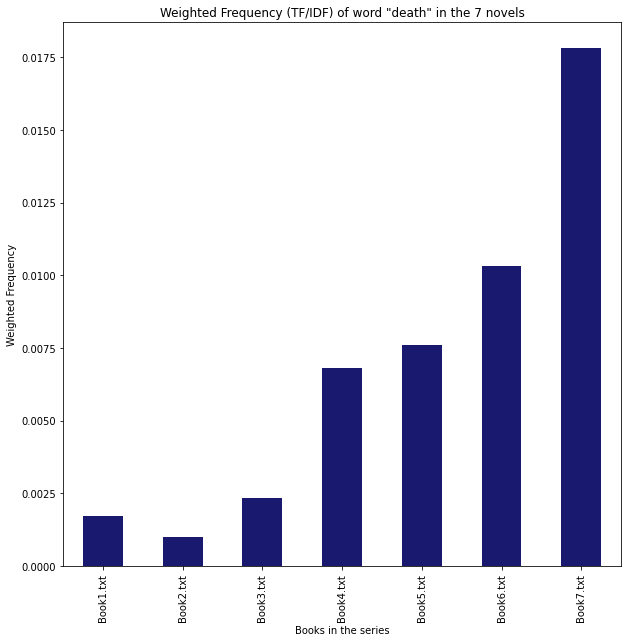

In [29]:
df['death'].plot(kind='bar', color='midnightblue')

# Add labels and title
plt.xlabel('Books in the series')
plt.ylabel('Weighted Frequency')
plt.title('Weighted Frequency (TF/IDF) of word "death" in the 7 novels')

# Show the plot
plt.show()


In [18]:
bk1 = df.loc['Book6.txt']
bk1[~bk1.index.isin(stopwords.words())].nlargest(20)

harry         0.199295
said          0.174741
dumbledore    0.074020
ron           0.062781
slughorn      0.056720
hermione      0.049681
could         0.034504
would         0.032643
back          0.030281
well          0.028706
know          0.027274
snape         0.027060
malfoy        0.026630
like          0.025270
think         0.024196
looked        0.023838
time          0.022764
see           0.022693
though        0.021619
around        0.021333
Name: Book6.txt, dtype: float64

In [19]:
df[df['006']> 0]['783']

KeyError: '006'

In [20]:
df.shape

(7, 20936)

As we normalized per `l2` during the TF-IDF vectorization, we can just get the cosine distance with a simple dot product between each of the document vectors.

In [21]:
import numpy as np

dat = {}

for f in df.index:
    dat[f] = df.dot(df.loc[f])

result_df = pd.DataFrame.from_dict(data=dat)
result_df.head()

,Book1.txt,Book2.txt,Book3.txt,Book4.txt,Book5.txt,Book6.txt,Book7.txt
Book1.txt,1.000000,0.986449,0.986676,0.985481,0.982069,0.979316,0.982407
Book2.txt,0.986449,1.000000,0.989689,0.988572,0.986002,0.982192,0.983639
Book3.txt,0.986676,0.989689,1.000000,0.988217,0.987385,0.981845,0.983797
Book4.txt,0.985481,0.988572,0.988217,1.000000,0.990858,0.985848,0.988657
Book5.txt,0.982069,0.986002,0.987385,0.990858,1.000000,0.990884,0.988015


In [22]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


def do_pca(df):
    pca = PCA(n_components=2)
    pca_corr_mat = pca.fit_transform(df)
    pca_res = pd.DataFrame(data = pca_corr_mat, columns = ['vector 1', 'vector 2'],
                           index = df.index)#, 'vector 3'])#, 'vector 4'])
    print(pca.explained_variance_ratio_)
    print(sum(pca.explained_variance_ratio_))
    return pca_res

def plot_pca(pca_res_df):
    plt.figure()
    plt.figure(figsize=(12,10))
    plt.axes(xlabel='Vector 1', ylabel='Vector 2')

    for i in pca_res_df.index:
        x, y = pca_res_df.loc[i]["vector 1"], pca_res_df.loc[i]["vector 2"]
        plt.scatter(x, y, s=50)
        plt.text(x+.005, y+.005, i, fontsize=10)
    plt.show()

In [23]:
res = do_pca(result_df)

[0.49051107 0.18371637]
0.6742274436607386


<Figure size 432x288 with 0 Axes>

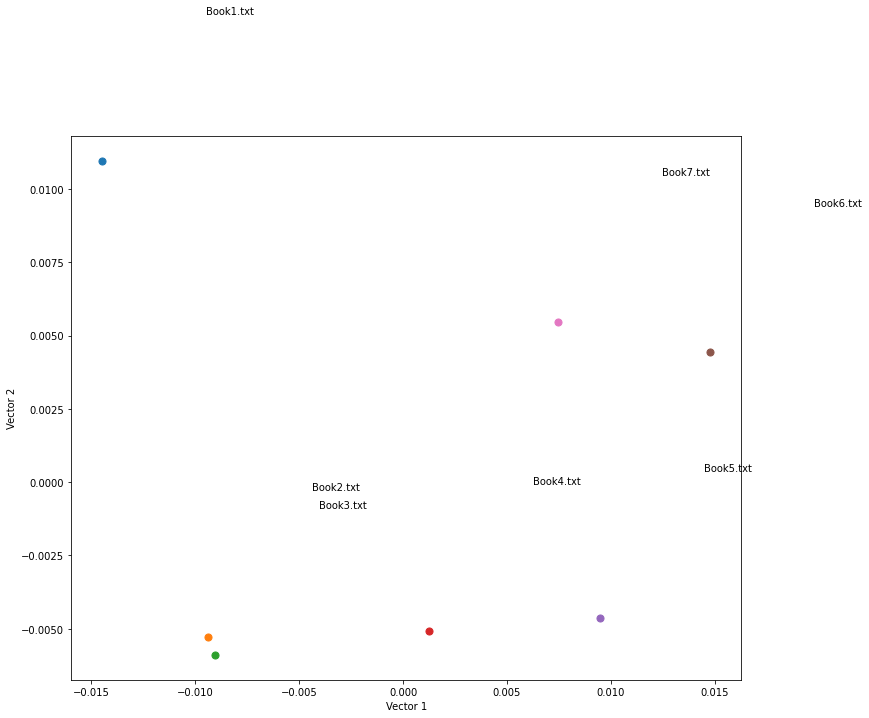

In [24]:
plot_pca(res)

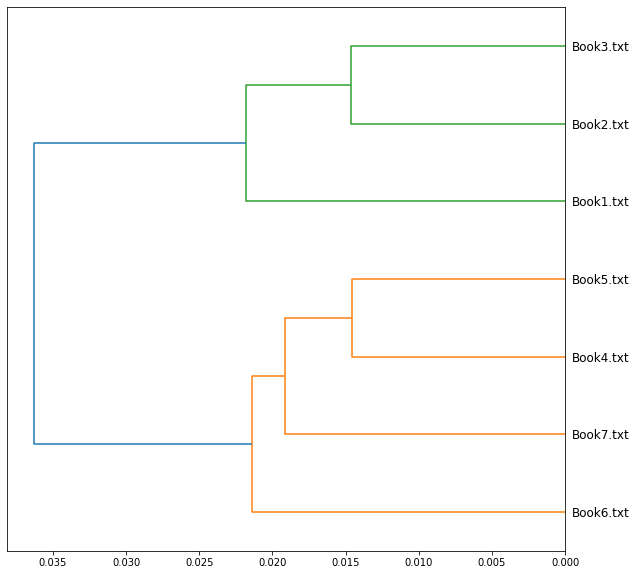

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams["figure.figsize"] = [10,10]

linkage_matrix = linkage(result_df, "ward")
dendrogram(linkage_matrix, labels=result_df.index, orientation='left')
# plt.savefig(os.path.expanduser('~/Desktop/dendro.pdf'))
plt.show()

Vedi [qui](https://stackoverflow.com/questions/14802048/scipy-dendrogram-leaf-label-colours) per assegnare un colore alle label

In [ ]:
biblio_df = pd.read_csv('references.csv')
biblio_df.head()

,Item type,Authors,Editors,Title,Publication year,Publisher,Address,Date published,Date accessed,URLs,Keywords,Short title,Series
0,Book,Anstey F,NaN,The Brass Bottle,1900,NaN,NaN,1900,2017-09-10,https://www.gutenberg.org/ebooks/30689,ChiLit,brass,NaN
1,Book,Crockett SR,NaN,The Surprising Adventures of Sir Toady Lion wi...,1897,NaN,NaN,1897,2017-09-10,https://www.gutenberg.org/ebooks/39340,ChiLit,toadylion,NaN
2,Book,Mare W,NaN,The Three Mulla-mulgars,1910,NaN,NaN,1910,2017-09-10,https://www.gutenberg.org/ebooks/32620,ChiLit,mulgars,NaN
3,Book,Ewing JH,NaN,Mrs. Overtheway's Remembrances,1869,NaN,NaN,1869,2017-09-10,https://www.gutenberg.org/ebooks/17772,ChiLit,overtheway,NaN
4,Book,Ewing JH,NaN,Jackanapes,1883,NaN,NaN,1883,2017-09-10,https://www.gutenberg.org/ebooks/20351,ChiLit,jackanapes,NaN


In [ ]:
len(biblio_df)

159

In [ ]:
auth_short = {}
for i,row in biblio_df.iterrows():
    if row.Keywords == "ChiLit":
        auth_short[f'{row["Short title"]}.txt'] = row.Authors


In [ ]:
auth_short['princess.txt']

'MacDonald G'

In [ ]:
set(auth_short.values())

{'Anstey F',
 'Austen J',
 'Ballantyne RM',
 'Barrie JM',
 'Braddon ME',
 'Brontë A',
 'Brontë C',
 'Brontë E',
 'Bulwer-Lytton E',
 'Burnett FH',
 'Carroll L',
 'Chesnutt CW',
 'Chopin K',
 'Collins W',
 'Conrad J',
 'Crockett SR',
 'Dickens C',
 'Disraeli B',
 'Doyle AC',
 'Dunbar PL',
 'Eliot G',
 'Ewing JH',
 'Falkner JM',
 'Farrar FW',
 'Farrow GE',
 'Forster EM',
 'Gaskell EC',
 'Gilman CP',
 'Grahame K',
 'Griggs SE',
 'Haggard HR',
 'Hardy T',
 'Harper FE',
 'Henty GA',
 'Hughes T',
 'Ingelow J',
 'James H',
 'Jefferies R',
 'Johnson JW',
 'Kingsley C',
 'Kipling R',
 'Lang A',
 'Lawrence DH',
 'MacDonald G',
 'Mahlberg M',
 'Mahlberg M,Wiegand V,Čermáková A',
 'Mare W',
 'Marryat F',
 'Martineau H',
 'Meade LT',
 'Molesworth NA',
 'Nesbit E',
 'Northup S',
 'Potter B',
 'Reed TB',
 'Rosato NJ,Rice C',
 'Ruskin J',
 'Sewell A',
 'Shelley MW',
 'Sinclair C',
 'Sinclair U',
 'Stevenson RL',
 'Stoker B',
 'Stretton H',
 'Strickland A',
 'Swift J',
 'Thackeray WM',
 'Trollope A',
 

In [ ]:
df.loc['princess.txt'].sort_values(ascending=False).head(20)

the         0.599800
and         0.307427
curdie      0.271767
to          0.242187
of          0.218768
it          0.165238
irene       0.160164
she         0.155560
her         0.152311
you         0.140889
in          0.136242
was         0.135870
he          0.125833
that        0.116354
princess    0.099725
had         0.093864
but         0.091633
lootie      0.086045
as          0.083455
they        0.082340
Name: princess.txt, dtype: float64

In [ ]:
df.loc['squirrel.txt'].sort_values(ascending=False).head(20)

nutkin          0.617768
the             0.388168
and             0.318082
squirrels       0.192407
of              0.150954
in              0.134780
brown           0.123947
twinkleberry    0.123554
old             0.120266
riddle          0.116956
hitty           0.098843
cuck            0.098843
his             0.097042
to              0.091651
mr              0.087699
but             0.086259
pitty           0.083895
up              0.080868
as              0.080868
nuts            0.077658
Name: squirrel.txt, dtype: float64

In [ ]:
biblio_df.columns

Index(['Item type', 'Authors', 'Editors', 'Title', 'Publication year',
       'Publisher', 'Address', 'Date published', 'Date accessed', 'URLs',
       'Keywords', 'Short title', 'Series'],
      dtype='object')

In [ ]:
len(biblio_df[biblio_df.Keywords == 'ChiLit']['Authors'].value_counts().index)

38